In [1]:
import pandas as pd 
import numpy as np

In [3]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
url_df = pd.read_csv(url,sep="\t")

In [16]:
url_df.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

In [18]:
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

###`Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [20]:
df = pd.DataFrame(data=data,index=labels)
df.head()


,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no


In [40]:
df.isnull().sum()

birds       0
age         2
visits      0
priority    1
dtype: int64

In [58]:
'''ii. Fill nan with respective series mode value.'''
for col in df.columns:
    df[col]=df[col].fillna(df[col].mode()[0], axis=0)
# df.isnull().sum()

In [35]:
# code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


In [37]:
df.describe()

,age,visits
count,9.000000,11.000000
mean,4.333333,2.818182
std,1.903943,0.873863
min,1.500000,2.000000
25%,3.500000,2.000000
50%,4.000000,3.000000
75%,5.500000,3.500000
max,8.000000,4.000000


In [39]:
df.iloc[::2]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


###`Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [41]:
# code here
df.iloc[[1,3,7],[0,1]]

,birds,age
b,Cranes,4.0
d,spoonbills,NaN
h,Cranes,NaN


In [43]:
df[df['visits']<4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


###`Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [53]:
# code here
df[np.isnan(df['age']) & np.isnan(df['visits'])]
# df.isnull().sum()

,birds,age,visits,priority


In [ ]:
'''ii. Fill nan with respective series mode value.'''
df.columns
for col in df.columns:
    df[col]=df[col].fillna(df[col].mode())
df.isnull().sum()

###`Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [11]:
# code here
df[df['birds'] == "Cranes"]['visits'].sum()

14

In [13]:
# ii. Find the number of each type of birds in dataframe. 

df.groupby("birds")["visits"].sum()

birds
Cranes        14
plovers        5
spoonbills    12
Name: visits, dtype: int64

In [25]:
# iii. Print no of duplicate rows 

df[df.duplicated()].shape[0]

1

In [27]:
# iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes. 

df = df.drop_duplicates()

In [29]:
df[df.duplicated()].shape[0]

0

##Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

In [5]:
ipl = pd.read_csv("IPL_Matches_2008_2022 - IPL_Matches_2008_2022.csv")
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


###Q-7: Player who got Most no. of player of the match award playing against Mumbai Indians.

Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.

In [96]:
df = ipl[((ipl["Team1"]=="Mumbai Indians")|(ipl["Team2"]=="Mumbai Indians")) & (ipl["WinningTeam"] != "Mumbai Indians")]

In [98]:
df["Player_of_Match"].value_counts()
# df.groupby("Player_of_Match")["Player_of_Match"].count().sort

Player_of_Match
SPD Smith     4
KL Rahul      4
SK Raina      4
JH Kallis     3
CH Gayle      3
             ..
JJ Bumrah     1
AJ Finch      1
SS Iyer       1
GJ Bailey     1
MV Boucher    1
Name: count, Length: 68, dtype: int64

###`Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [49]:
# code here
# ipl.columns
# Team1,Team2,WinningTeam

# ipl[['Team1',"Team2","WinningTeam"]]=ipl[['Team1',"Team2","WinningTeam"]].replace('Delhi Daredevils','Delhi Capitals')
# ipl[['Team1',"Team2","WinningTeam"]]=ipl[['Team1',"Team2","WinningTeam"]].replace('Kings XI Punjab','Punjab Kings')
# ipl[['Team1',"Team2","WinningTeam"]]=ipl[['Team1',"Team2","WinningTeam"]].replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [7]:
# Replace team names inside specific columns
ipl[['Team1', 'Team2', 'WinningTeam']] = ipl[['Team1', 'Team2', 'WinningTeam']].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
})

###`Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


<Axes: xlabel='Team1'>

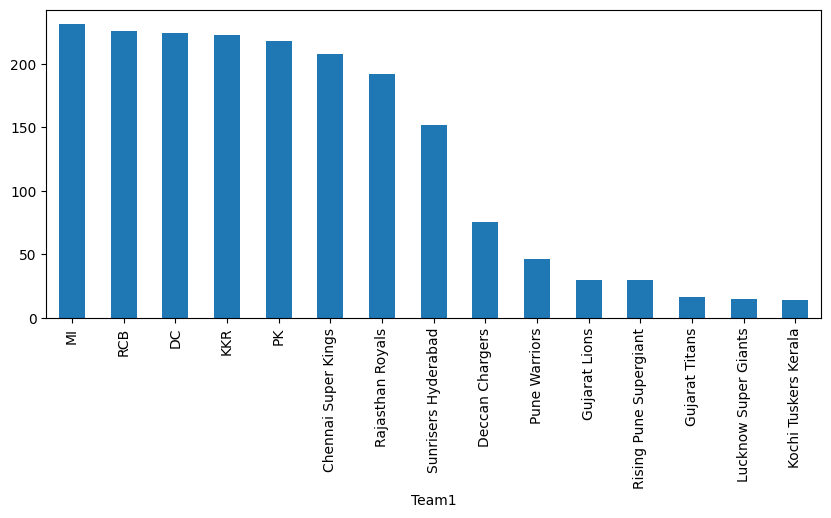

In [88]:
# code here
match1 = ipl.groupby("Team1")["Team1"].count()
match2 = ipl.groupby("Team2")["Team2"].count()
match = match1+match2
match.sort_values(ascending=False).head(5)
dec = {"Mumbai Indians":"MI","Royal Challengers Bangalore":"RCB","Delhi Capitals":"DC","Kolkata Knight Riders":"KKR","Punjab Kings":"PK"}
match.rename(dec).sort_values(ascending=False).plot(kind="bar",figsize=(10, 4))

###`Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [116]:
# code here
ipl[((ipl['Team1']=="Mumbai Indians") | (ipl["Team2"]=="Mumbai Indians")) & (ipl["WinningTeam"] != "Mumbai Indians")].groupby("Player_of_Match")["Player_of_Match"].count().sort_values(ascending=False).head(10)

Player_of_Match
KL Rahul         4
SPD Smith        4
SK Raina         4
A Mishra         3
CH Gayle         3
A Nehra          3
V Sehwag         3
KC Sangakkara    3
JH Kallis        3
JC Buttler       3
Name: Player_of_Match, dtype: int64

###`Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player which getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [137]:
# code here
def teamVs(team1,team2):
    match = ipl[((ipl["Team1"]==team1) & (ipl["Team2"]==team2)) | ((ipl["Team1"]==team2) & (ipl["Team2"]==team1))]
    manOf_match = match.groupby("Player_of_Match")["Player_of_Match"].count().sort_values(ascending = False).head(1)
    return (match.groupby("WinningTeam")["WinningTeam"].count(),manOf_match)
    
teamVs('Kolkata Knight Riders','Chennai Super Kings')

(WinningTeam
 Chennai Super Kings      17
 Kolkata Knight Riders     9
 Name: WinningTeam, dtype: int64,
 Player_of_Match
 RA Jadeja    3
 Name: Player_of_Match, dtype: int64)

### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



<Axes: xlabel='City'>

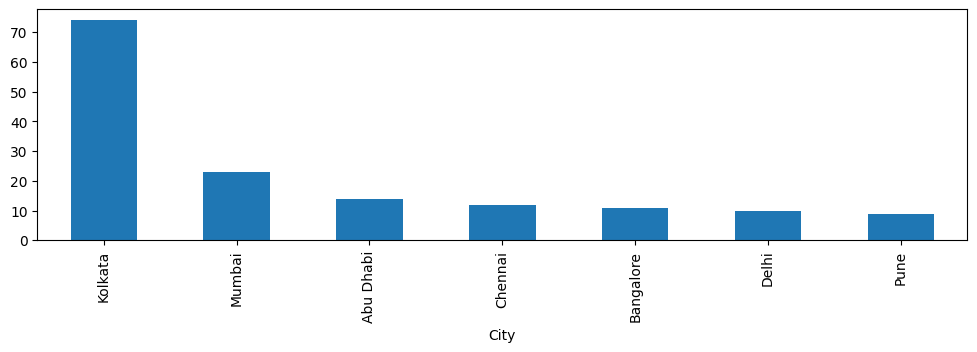

In [155]:
# code here
city = ipl[(ipl["Team1"]=="Kolkata Knight Riders") | (ipl["Team2"]=="Kolkata Knight Riders")].groupby("City")["City"].count().sort_values(ascending=False)
city.head(7).plot(kind="bar",figsize=(12,3))

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [163]:
# code here
ipl[(ipl['Season']=='2011') & ((ipl['Team1']=="Mumbai Indians") | (ipl['Team2']=="Mumbai Indians"))]["Margin"].mean()

19.25

In [9]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [11]:
df1 = ipl

In [23]:
df1[(df1['Season']=="2011") &((df1['Team1']=='Mumbai Indians') | (df1['Team2']=='Mumbai Indians'))]['Margin'].mean()

19.25